In [ ]:
import pandas as pd
# for precision and recall measurements
from sklearn import metrics as mt


# toy example data

row_number = [1, 2, 3, 4, 5, 6, 7, 8, 9]

names = ['Ali', 'Emilio', 'Tom', 'Julie', 'Ignacio', 'Ugo', 'Yuqi', 'Meagan', 'Andrea']

reported_gender = ['male', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male']

predicted_gender = ['female', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'female']

df = pd.DataFrame({'row_number': row_number, 
                   'names':names,
                    'reported_gender': reported_gender,
                    'predicted_gender': predicted_gender})

df

,row_number,names,reported_gender,predicted_gender
0,1,Ali,male,female
1,2,Emilio,male,male
2,3,Tom,male,male
3,4,Julie,female,female
4,5,Ignacio,male,female
5,6,Ugo,male,male
6,7,Yuqi,female,male
7,8,Meagan,female,female
8,9,Andrea,male,female


In [ ]:
TP_m = 1 + 1 + 1

# false positives for males, those reported female who are predicted male
# Yuqi
FP_m = 1

# false negatives for males, those reported male who are predicted female.
# Ali, Ignacio, Andrea
FN_m = 1 + 1 + 1

# true negatives for males, those reported female who are predicted female.
# Julie, Meagan
TN_m = 1 + 1

### now calculation for females
# true positives for females, those reported female who are also predicted female. 
# Julie, Meagan
TP_f = 1 + 1

# false positives for females, those reported male who are predicted female
# Ali, Ignacio, Andrea
FP_f = 1 + 1 + 1

# false negatives for females, those reported female who are predicted male.
# Yuqi
FN_f = 1

# true negatives for females, those reported male who are predicted male.
# Emilio, Tom, Ugo
TN_f = 1 + 1 + 1

In [ ]:
precision_male = TP_m / (TP_m + FP_m)
print(precision_male)

0.75


In [ ]:
recall_male = TP_m / (TP_m + FN_m)
print(recall_male)

0.5


In [ ]:
f1_male = 2 * TP_m / (2 * TP_m + FP_m + FN_m)
print(f1_male)

0.6


In [ ]:
precision_female = TP_f / (TP_f + FP_f)
print(precision_female)

0.4


In [ ]:
recall_female = TP_f / (TP_f + FN_f)
print(recall_female)

0.6666666666666666


In [ ]:
f1_female = 2 * TP_f / (2 * TP_f + FP_f + FN_f)
print(f1_female)

0.5


In [ ]:
overall_prere = pd.DataFrame(mt.classification_report(df.reported_gender, df.predicted_gender, output_dict=True))

# add country name
overall_prere['countrycode'] = 'all_countries'

print(overall_prere)

             female  male  accuracy  macro avg  weighted avg    countrycode
precision  0.400000  0.75  0.555556   0.575000      0.633333  all_countries
recall     0.666667  0.50  0.555556   0.583333      0.555556  all_countries
f1-score   0.500000  0.60  0.555556   0.550000      0.566667  all_countries
support    3.000000  6.00  0.555556   9.000000      9.000000  all_countries


In [ ]:
reported_country = ['Iran', 'Italy', 'Germany', 'Korea', 'Chile', 'Italy', 'China', 'USA', 'Italy']

affiliation_country = ['Germany', 'Germany', 'Germany', 'USA', 'UK', 'Germany', 'UK', 'USA', 'USA']

df_w_country = pd.DataFrame({'row_number': row_number, 
                   'names':names,
                    'reported_gender': reported_gender,
                    'predicted_gender': predicted_gender,
                    'reported_country': reported_country,
                    'affiliation_country': affiliation_country})

df_w_country

,row_number,names,reported_gender,predicted_gender,reported_country,affiliation_country
0,1,Ali,male,female,Iran,Germany
1,2,Emilio,male,male,Italy,Germany
2,3,Tom,male,male,Germany,Germany
3,4,Julie,female,female,Korea,USA
4,5,Ignacio,male,female,Chile,UK
5,6,Ugo,male,male,Italy,Germany
6,7,Yuqi,female,male,China,UK
7,8,Meagan,female,female,USA,USA
8,9,Andrea,male,female,Italy,USA


In [ ]:
results_list = []

# grouped version of data
grouped_df = df_w_country.groupby('affiliation_country')

# with for loop of all countries, it took 77 minutes
for countrycode, country_dt in grouped_df:
    print(countrycode, '\n')
    res = pd.DataFrame(mt.classification_report(country_dt.reported_gender, country_dt.predicted_gender, output_dict=True))
    res['countrycode'] = countrycode
    results_list.append(res)

results_all = pd.concat(results_list)

# add overall countries
results_all = pd.concat([results_all, overall_prere])

# drop index and rename it
results_all = results_all.reset_index().rename(columns={'index':'metric'})

print(results_all)

Germany 

UK 

USA 

       metric    female      male  accuracy  macro avg  weighted avg  \
0   precision  0.000000  1.000000  0.750000   0.500000      1.000000   
1      recall  0.000000  0.750000  0.750000   0.375000      0.750000   
2    f1-score  0.000000  0.857143  0.750000   0.428571      0.857143   
3     support  0.000000  4.000000  0.750000   4.000000      4.000000   
4   precision  0.000000  0.000000  0.000000   0.000000      0.000000   
5      recall  0.000000  0.000000  0.000000   0.000000      0.000000   
6    f1-score  0.000000  0.000000  0.000000   0.000000      0.000000   
7     support  1.000000  1.000000  0.000000   2.000000      2.000000   
8   precision  0.666667  0.000000  0.666667   0.333333      0.444444   
9      recall  1.000000  0.000000  0.666667   0.500000      0.666667   
10   f1-score  0.800000  0.000000  0.666667   0.400000      0.533333   
11    support  2.000000  1.000000  0.666667   3.000000      3.000000   
12  precision  0.400000  0.750000  0.555556

c:\Users\akbaritabar\AppData\Local\anaconda3\envs\Ali\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\akbaritabar\AppData\Local\anaconda3\envs\Ali\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\akbaritabar\AppData\Local\anaconda3\envs\Ali\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [ ]:
results_all

,metric,female,male,accuracy,macro avg,weighted avg,countrycode
0,precision,0.000000,1.000000,0.750000,0.500000,1.000000,Germany
1,recall,0.000000,0.750000,0.750000,0.375000,0.750000,Germany
2,f1-score,0.000000,0.857143,0.750000,0.428571,0.857143,Germany
3,support,0.000000,4.000000,0.750000,4.000000,4.000000,Germany
4,precision,0.000000,0.000000,0.000000,0.000000,0.000000,UK
5,recall,0.000000,0.000000,0.000000,0.000000,0.000000,UK
6,f1-score,0.000000,0.000000,0.000000,0.000000,0.000000,UK
7,support,1.000000,1.000000,0.000000,2.000000,2.000000,UK
8,precision,0.666667,0.000000,0.666667,0.333333,0.444444,USA
9,recall,1.000000,0.000000,0.666667,0.500000,0.666667,USA


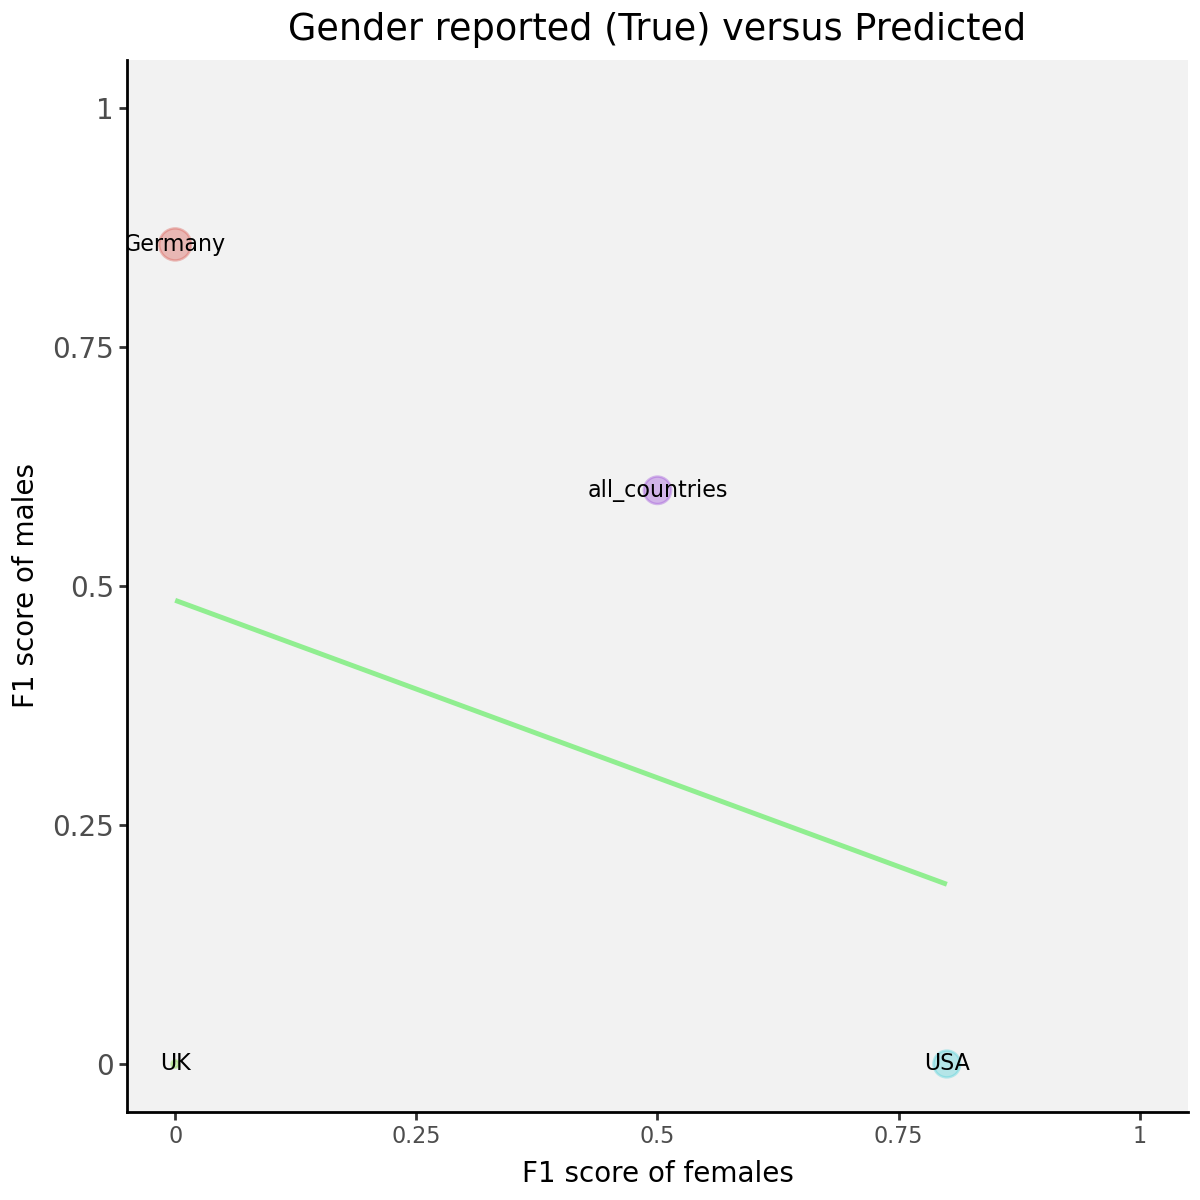

In [ ]:
import plotnine as gg

(
    gg.ggplot((results_all[results_all.metric == 'f1-score']),
    gg.aes('female', 'male')
    ) +
    gg.geom_point(gg.aes(size='weighted avg', color='factor(countrycode)'), alpha=0.4) +
    gg.geom_smooth(color='lightgreen', method='lm') +
    gg.geom_text(gg.aes(label='countrycode'), size=8) +
    gg.scale_x_continuous(limits=[0,1], labels=[0, .25, 0.5, .75, 1]) +
    gg.scale_y_continuous(limits=[0,1], labels=[0, .25, 0.5, .75, 1]) +
    gg.theme_classic() +
    gg.labs(x="F1 score of females", y="F1 score of males", title='Gender reported (True) versus Predicted', size='Weighted avg') +
    gg.theme_classic() +
    gg.theme(panel_background=gg.element_rect(fill='gray', alpha=.1), legend_position='none',
             axis_text_x=gg.element_text(size=8),
             axis_text_y=gg.element_text(hjust=1, size=10),
             axis_title_x=gg.element_text(size=10),
             axis_title_y=gg.element_text(size=10),
             strip_text_x=gg.element_text(size=10),
             figure_size=(6, 6))
)